# Restoring Color to Greyscale Images

In [353]:
import image
import os
import random
import numpy as np
import scipy as sp
import time

import lasagne
import theano
import theano.tensor as T

%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
from matplotlib import cm
figsize(16, 4)

In [354]:
imdir = "images/raw"
handles = [os.path.join(imdir, h) for h in os.listdir(imdir)]
random.shuffle(handles)
print "Found {l} image handles".format(l=len(handles))

Found 30113 image handles


In [355]:
import convnet
reload(convnet)
reload(image)

SIZE = 100

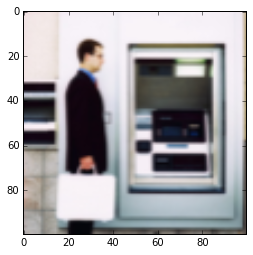

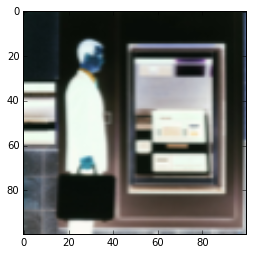

In [356]:
val_images, test_images, train_handles = convnet.ValidationTestTrainSplit(
    handles, 50, 10, SIZE, SIZE)
plt.imshow(val_images[0])
plt.show()

In [357]:
net, train_fn, val_fn = convnet.CreateTheanoExprs(SIZE, SIZE, 0.001)

In [358]:
#batch_stats, val_stats, err, net = convnet.Train(
images = convnet.Train(
    num_batches=6,
    validate_every_n_batches=2,
    height=SIZE,
    width=SIZE,
    batch_size=100,
    image_handles=handles,
    val_set_size=100,
    test_set_size=100,
    net=net,
    train_fn=train_fn,
    val_fn=val_fn)

Loading validation and testing images...
Starting training...
Training batch 0 of 100 images. Last time = 0.00 seconds. Last load time = 0.00 seconds. Last error = 1.00000.
Training batch 1 of 100 images. Last time = 2.54 seconds. Last load time = 1.53 seconds. Last error = 4.01305.

Validating...
Validated on 100 images in 0.97 seconds. Error = 3.97346.

Training batch 2 of 100 images. Last time = 2.86 seconds. Last load time = 1.72 seconds. Last error = 3.98211.
Training batch 3 of 100 images. Last time = 3.00 seconds. Last load time = 1.69 seconds. Last error = 3.97167.

Validating...
Validated on 100 images in 1.17 seconds. Error = 3.89702.

Training batch 4 of 100 images. Last time = 3.04 seconds. Last load time = 1.77 seconds. Last error = 3.95125.
Training batch 5 of 100 images. Last time = 2.79 seconds. Last load time = 1.56 seconds. Last error = 3.89727.

Validating...
Validated on 100 images in 1.06 seconds. Error = 3.15211.


Testing!...
Testing completed in 1.06 seconds. Te

In [359]:
def PrintShapes(net):
    print net.__class__.__name__, getattr(net, "input_shape", ""), "=>", getattr(net, "output_shape", "")
    input_layer = getattr(net, "input_layer", None)
    if input_layer:
        PrintShapes(input_layer)

In [360]:
PrintShapes(net)

DimshuffleLayer (None, 3, 100, 100) => (None, 100, 100, 3)
Conv2DLayer (None, 5, 100, 100) => (None, 3, 100, 100)
Conv2DLayer (None, 12, 100, 100) => (None, 5, 100, 100)
Conv2DLayer (None, 1, 100, 100) => (None, 12, 100, 100)
DimshuffleLayer (None, 100, 100) => (None, 1, 100, 100)
InputLayer  => (None, 100, 100)


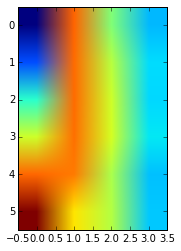

In [361]:
plt.imshow(images[0])

In [362]:
plt.imshow(255 - images[0])

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [ ]:
print images[0]
g